# Regressão múltipla
A regressão múltipla ocorre quando temos mais de uma variável independente.

## Dados de desempenho de um servidor web
Os dados para este trabalho foram coletados de um servidor web que hospeda um site. As observações são as médias das variáveis por minuto:

Duracao_media_ms: Duração média do processamento de um Request HTTP (em milissegundos);
Perc_medio_CPU: Percentual médio de ocupação da CPU;
Load_avg_minute: Carga total dos processadores;
Requests_média: Quantidade média de requests processados.

In [2]:
df <- read.csv('servidor.csv')
head(df)
str(df)

Duracao_media_ms,Perc_medio_CPU,Load_avg_minute,Requests_média
150,10.580584,0.6547530,72
140,9.957563,0.5304159,120
150,10.718390,0.7739702,200
155,10.975842,0.5812908,85
140,9.824099,0.6504205,56
150,10.552237,0.5846244,230


'data.frame':	29 obs. of  4 variables:
 $ Duracao_media_ms: int  150 140 150 155 140 150 145 150 151 150 ...
 $ Perc_medio_CPU  : num  10.58 9.96 10.72 10.98 9.82 ...
 $ Load_avg_minute : num  0.655 0.53 0.774 0.581 0.65 ...
 $ Requests_média  : int  72 120 200 85 56 230 620 560 530 525 ...


In [3]:
summary(df)

 Duracao_media_ms Perc_medio_CPU    Load_avg_minute  Requests_média  
 Min.   : 140.0   Min.   :  6.867   Min.   :0.4983   Min.   :  56.0  
 1st Qu.: 150.0   1st Qu.: 10.582   1st Qu.:0.6504   1st Qu.: 230.0  
 Median : 520.0   Median : 20.151   Median :2.3333   Median : 720.0  
 Mean   : 811.6   Mean   : 47.975   Mean   :3.9274   Mean   : 631.8  
 3rd Qu.:1500.0   3rd Qu.: 98.171   3rd Qu.:7.3177   3rd Qu.: 890.0  
 Max.   :1950.0   Max.   :121.236   Max.   :9.5802   Max.   :1535.0  

In [4]:
model <- lm(df$Duracao_media_ms ~ df$Perc_medio_CPU + df$Load_avg_minute + df$Requests_média)
summary(model)


Call:
lm(formula = df$Duracao_media_ms ~ df$Perc_medio_CPU + df$Load_avg_minute + 
    df$Requests_média)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.598 -12.485  -0.115  10.901  32.169 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.079e+01  6.316e+00   3.292  0.00296 ** 
df$Perc_medio_CPU  2.873e-01  2.847e-01   1.009  0.32262    
df$Load_avg_minute 1.944e+02  3.828e+00  50.799  < 2e-16 ***
df$Requests_média  2.119e-02  9.605e-03   2.206  0.03681 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.5 on 25 degrees of freedom
Multiple R-squared:  0.9995,	Adjusted R-squared:  0.9995 
F-statistic: 1.755e+04 on 3 and 25 DF,  p-value: < 2.2e-16


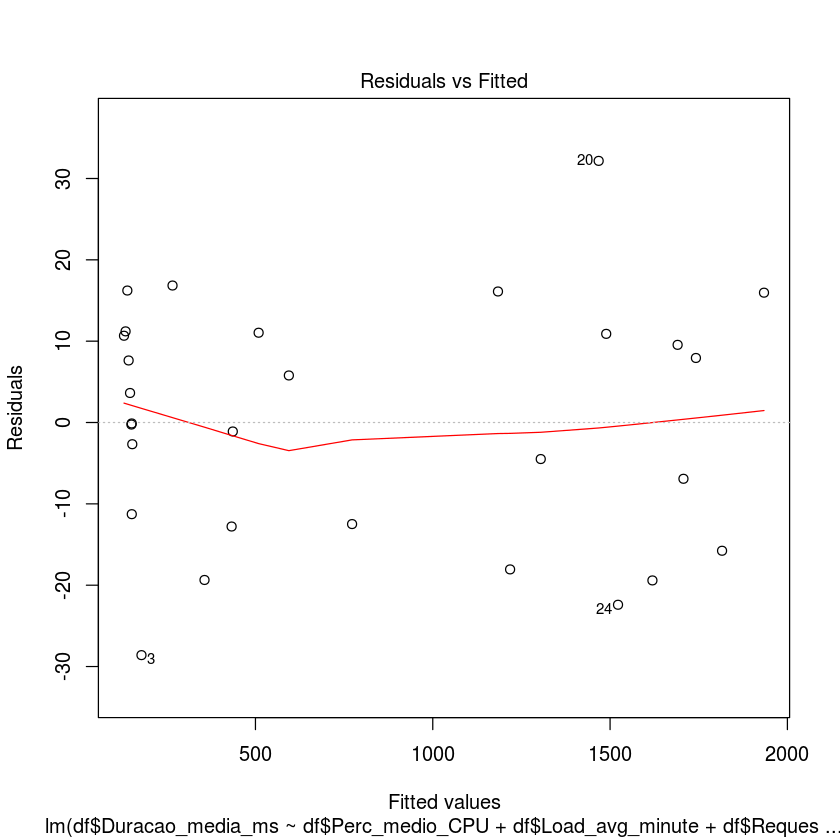

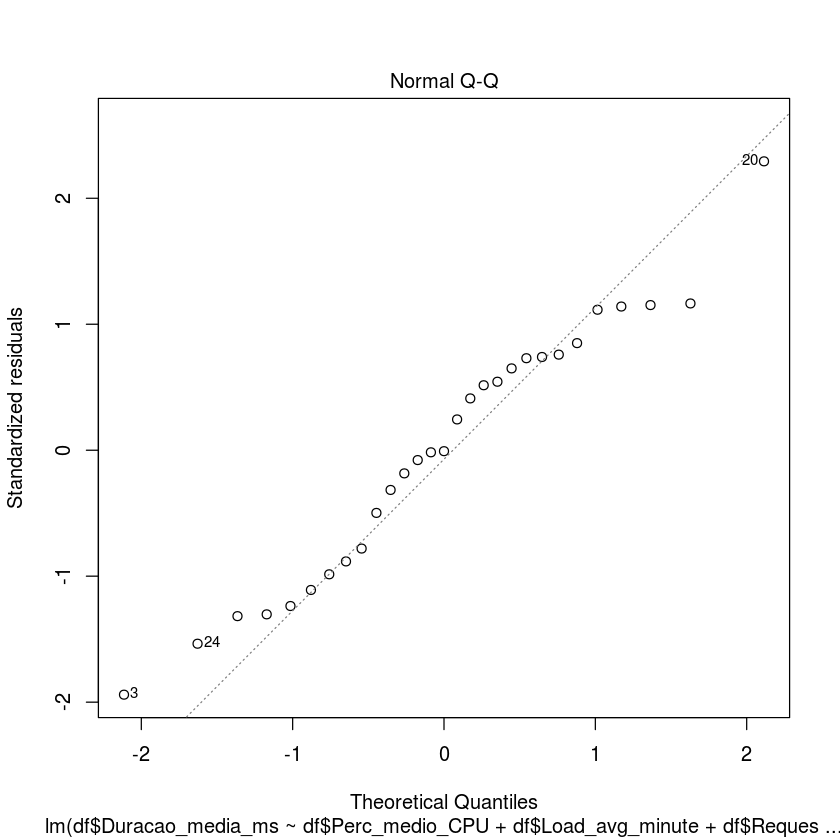

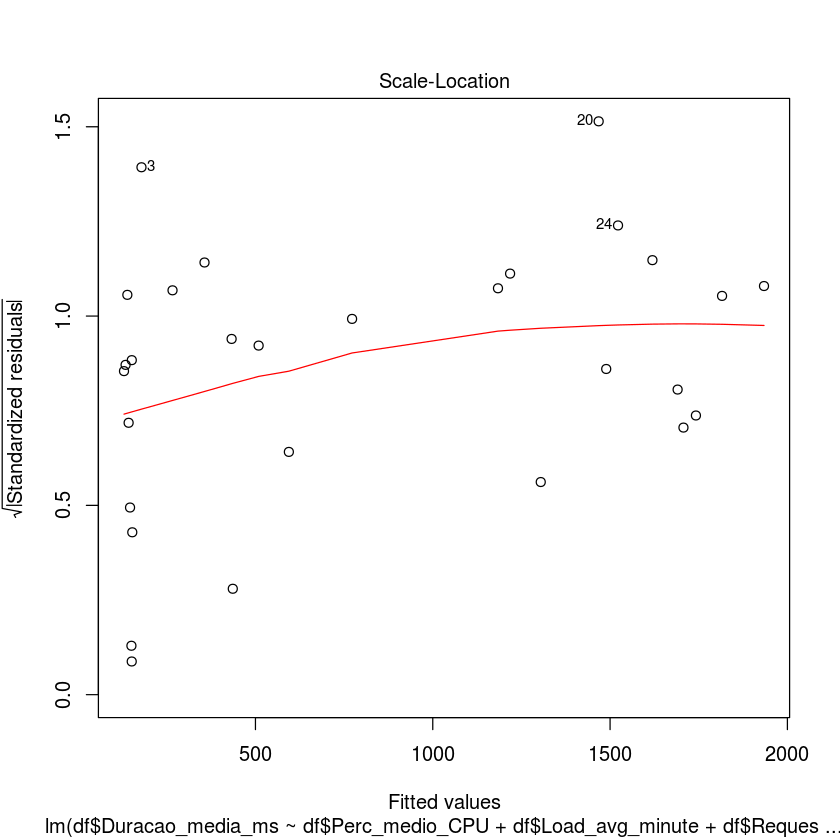

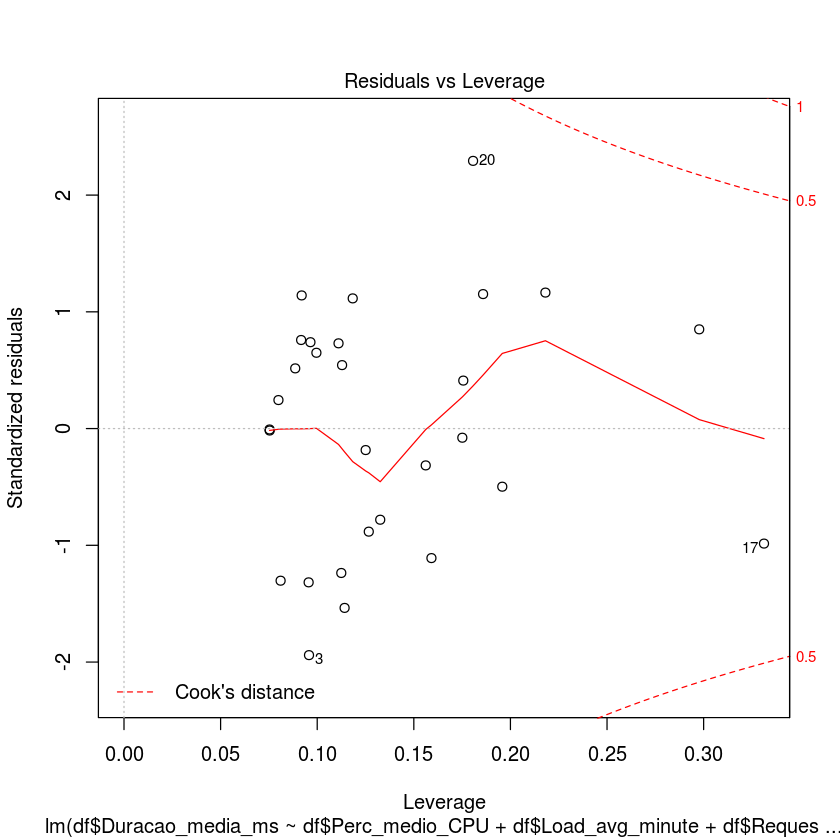

In [5]:
plot(model)

## Multicolinearidade (VIF)

In [6]:
library(car)

In [7]:
vif(model)

df$Perc_medio_CPU df$Load_avg_minute  df$Requests_média 
          17.70187           19.50619            1.64511

## Heterocedasticidade

In [8]:
ncvTest(model)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.8242639    Df = 1     p = 0.3639365 

## Auto correlação dos resíduos

In [9]:
durbinWatsonTest(model)

 lag Autocorrelation D-W Statistic p-value
   1      -0.2504768      2.479978   0.354
 Alternative hypothesis: rho != 0

## Avaliação do modelo

- Modelo: y = 0.2873x1 + 194.4x2 + 0.02119x3 + 20.79
- R quadrado ajustado: 0.999;
- Significância da regressão (F-test): Rejeitamos a hipótese nula de coeficientes zerados;
- Significância dos coeficientes: O Coeficiente "Perc_medio_CPU" poderia ser retirado do modelo;
- Multicolinearidade (VIF): Temos multicolinearidade entre "Perc_medio_CPU" e "Load_avg_minute", porém, não há muito o que fazer sobre isso;
- Heterocedasticidade: De acordo com o teste de Breusch-Pagan (p-value > 0.05) o modelo é homocedástico. Porém, a análise gráfica deixa dúvidas, especialmente no gráfico Residuals Vs Fitted;
- Autocorrelação dos resíduos: Há uma ligeira autocorrelação negativa (2.48)